# Loading Dataset

In [1]:
import pandas as pd
# Loading the datasets
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

In [2]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

# Data Preprocessing

In [6]:
#checking null values
ratings.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [7]:
movies.isnull().sum()

movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [8]:
#Checking duplicates
ratings.duplicated().sum()

0

In [9]:
movies.duplicated().sum()

0

In [10]:
movies[movies['release_date'].isnull()==True]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ratings[ratings['item_id']==267]

,user_id,item_id,rating,timestamp
2172,130,267,5,875801239
3781,5,267,4,875635064
7245,268,267,3,875742077
12475,297,267,3,875409139
14756,319,267,4,875707690
15292,1,267,4,875692955
49295,532,267,3,875441348
93523,833,267,1,875655669
99723,422,267,4,875655986


In [12]:
#Dropping columns
movies=movies.drop('video_release_date',axis=1)
movies=movies.dropna()
movies = movies.reset_index(drop=True)

In [13]:
movies.isnull().sum()

movie_id        0
movie_title     0
release_date    0
IMDb_URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [14]:
movies.head()

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
ratings=ratings[ratings['item_id']!=267]
ratings = ratings.reset_index(drop=True)

In [16]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99986,880,476,3,880175444
99987,716,204,5,879795543
99988,276,1090,1,874795795
99989,13,225,2,882399156


- After removing the null values there are 99991 rows in the dataframe

In [17]:
# Merging the ratings and movies datasets
merged_data = pd.merge(ratings, movies, left_on='item_id', right_on='movie_id')

# first few rows of the merged dataset
merged_data.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,302,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,377,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,51,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,346,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99987 entries, 0 to 99986
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       99987 non-null  int64 
 1   item_id       99987 non-null  int64 
 2   rating        99987 non-null  int64 
 3   timestamp     99987 non-null  int64 
 4   movie_id      99987 non-null  int64 
 5   movie_title   99987 non-null  object
 6   release_date  99987 non-null  object
 7   IMDb_URL      99987 non-null  object
 8   unknown       99987 non-null  int64 
 9   Action        99987 non-null  int64 
 10  Adventure     99987 non-null  int64 
 11  Animation     99987 non-null  int64 
 12  Children's    99987 non-null  int64 
 13  Comedy        99987 non-null  int64 
 14  Crime         99987 non-null  int64 
 15  Documentary   99987 non-null  int64 
 16  Drama         99987 non-null  int64 
 17  Fantasy       99987 non-null  int64 
 18  Film-Noir     99987 non-null  int64 
 19  Horr

- There are 99987 rows in the merged dataframe

In [19]:
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'], unit='s')

# EDA

In [20]:
merged_data.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,302,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,377,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,51,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,346,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#oldest rating
oldest_rating = merged_data.loc[merged_data['timestamp'].idxmin()]
oldest_rating

user_id                                                       259
item_id                                                       255
rating                                                          4
timestamp                                     1997-09-20 03:05:10
movie_id                                                      255
movie_title                       My Best Friend's Wedding (1997)
release_date                                          20-Jun-1997
IMDb_URL        http://us.imdb.com/M/title-exact?My+Best+Frien...
unknown                                                         0
Action                                                          0
Adventure                                                       0
Animation                                                       0
Children's                                                      0
Comedy                                                          1
Crime                                                           0
Documentar

In [22]:
#newest rating
newest_rating = merged_data.loc[merged_data['timestamp'].idxmax()]
newest_rating

user_id                                                       729
item_id                                                       328
rating                                                          3
timestamp                                     1998-04-22 23:10:38
movie_id                                                      328
movie_title                              Conspiracy Theory (1997)
release_date                                          08-Aug-1997
IMDb_URL        http://us.imdb.com/M/title-exact?Conspiracy+Th...
unknown                                                         0
Action                                                          1
Adventure                                                       0
Animation                                                       0
Children's                                                      0
Comedy                                                          0
Crime                                                           0
Documentar

In [23]:
# Count the number of 5-star rated movies
five_star_movies = merged_data[merged_data['rating'] == 5].shape[0]
print(f"The number of 5-star rated movies is: {five_star_movies}")

The number of 5-star rated movies is: 21199


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Filter the DataFrame for 5-star ratings
five_star_df = merged_data[merged_data['rating'] == 5]

# Select genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Sum the 5-star ratings for each genre
genre_five_star_counts = five_star_df[genre_columns].sum().sort_values(ascending=False)

print(genre_five_star_counts)

Drama          9997
Comedy         5224
Action         5102
Romance        4559
Thriller       4312
Sci-Fi         2914
War            2914
Adventure      2903
Crime          1963
Mystery        1225
Children's     1217
Musical        1050
Horror          877
Animation       796
Film-Noir       560
Western         394
Documentary     209
Fantasy         176
dtype: int64


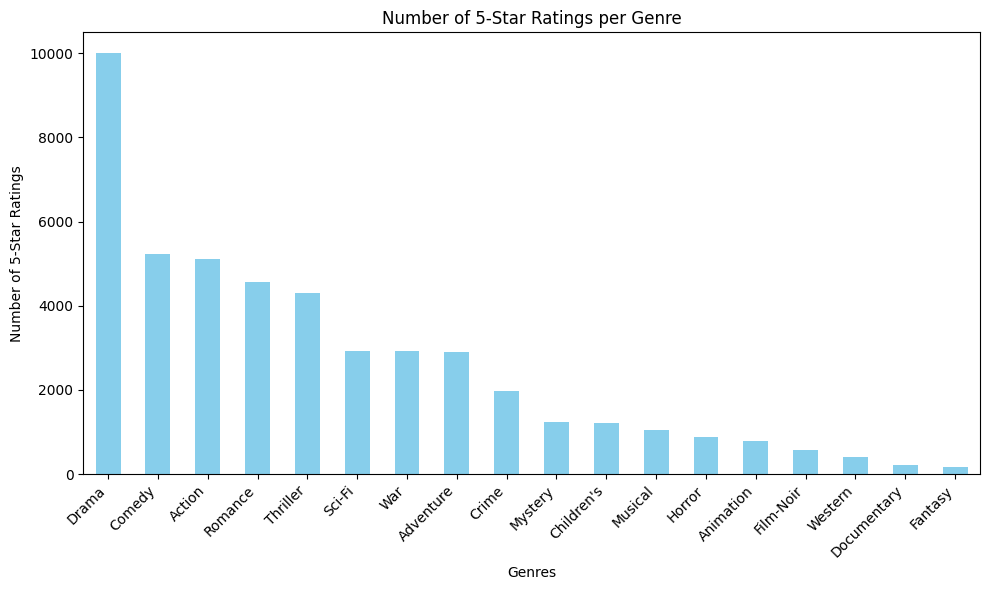

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
genre_five_star_counts.plot(kind='bar', color='skyblue')
plt.title('Number of 5-Star Ratings per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of 5-Star Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

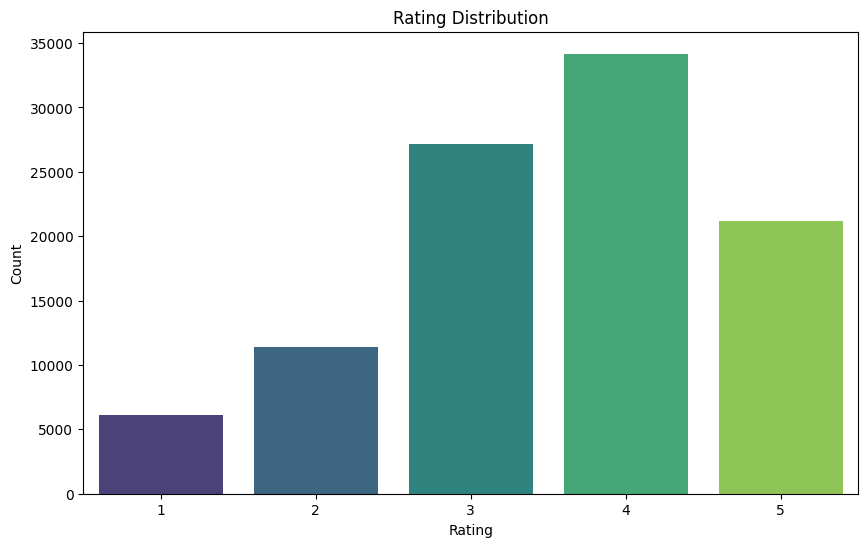

In [27]:
# Plot the rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

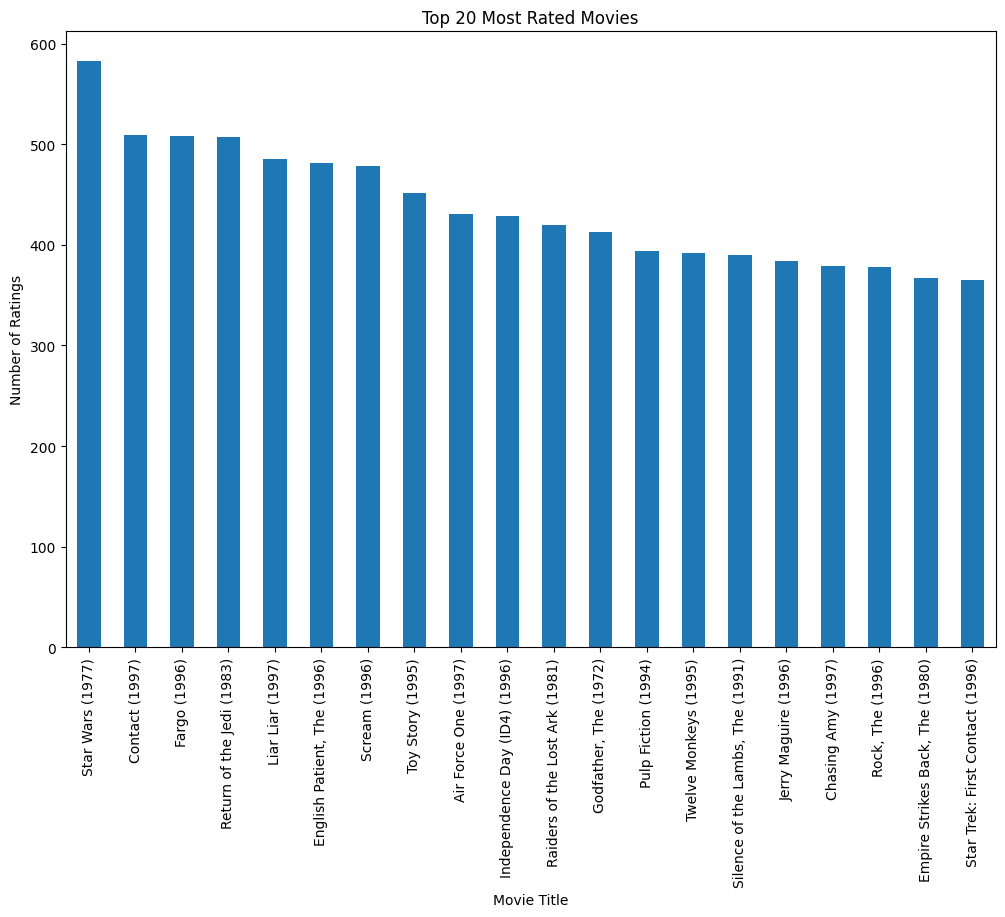

In [28]:
# Count the number of ratings per movie
ratings_per_movie = merged_data.groupby('movie_title').size().sort_values(ascending=False)

# Plot the top 20 most rated movies
plt.figure(figsize=(12, 8))
ratings_per_movie[:20].plot(kind='bar')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

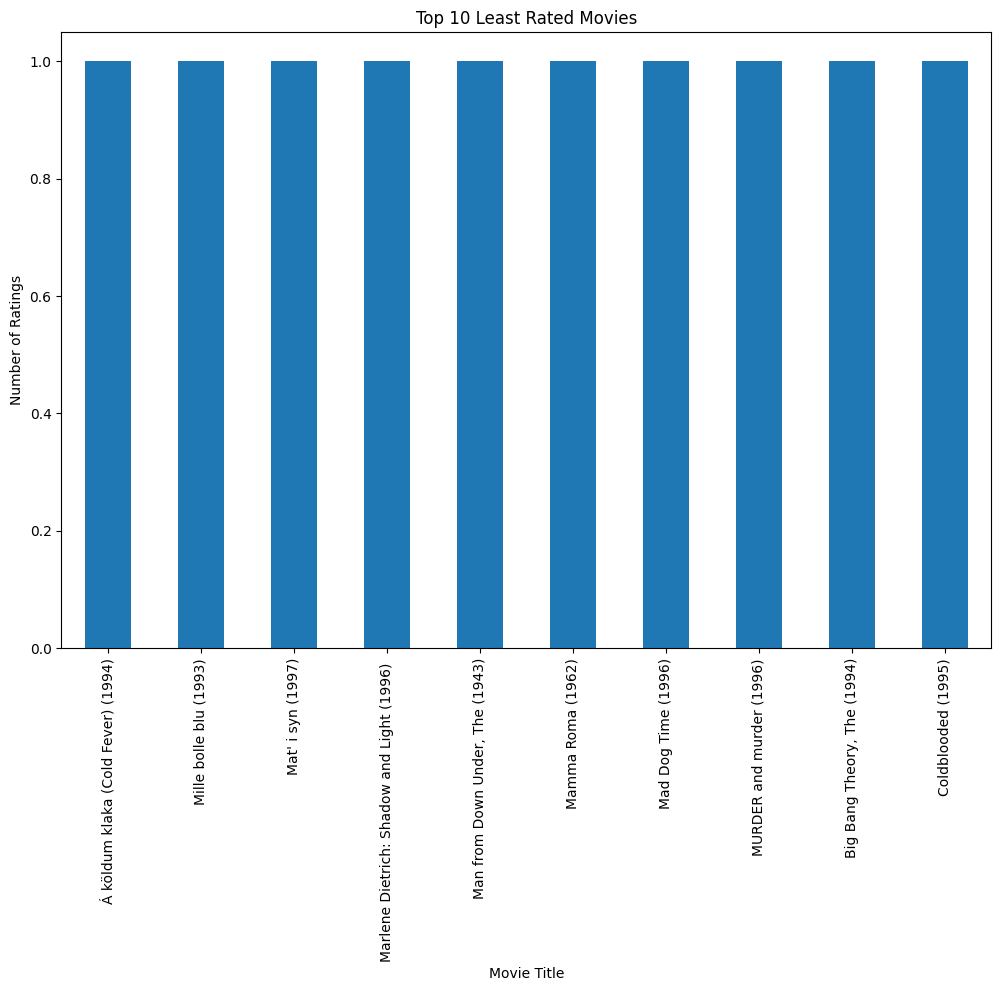

In [29]:
# Count the number of ratings per movie
ratings_per_movie = merged_data.groupby('movie_title').size().sort_values(ascending=True)

# Plot the top 20 most rated movies
plt.figure(figsize=(12, 8))
ratings_per_movie[:10].plot(kind='bar')
plt.title('Top 10 Least Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

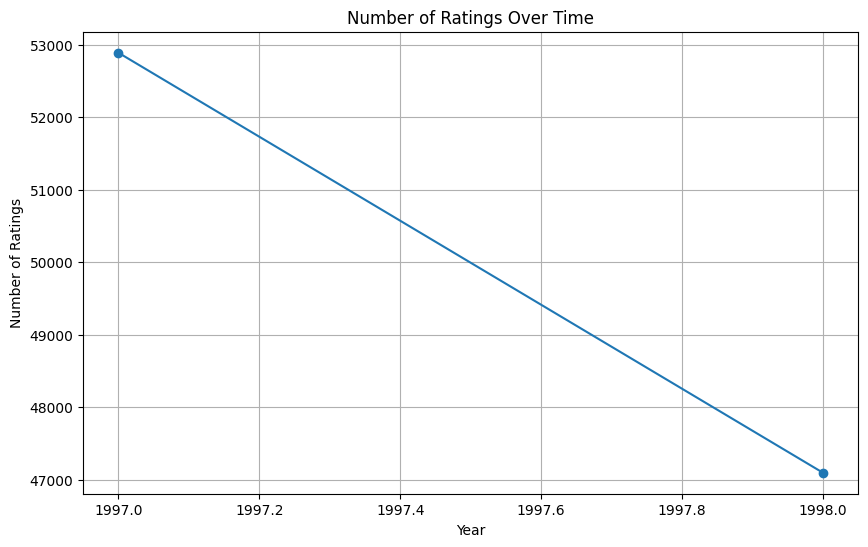

In [31]:
# Plot the number of ratings over time
ratings_per_year = merged_data.groupby(merged_data['timestamp'].dt.year).size()

plt.figure(figsize=(10, 6))
ratings_per_year.plot(kind='line', marker='o')
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

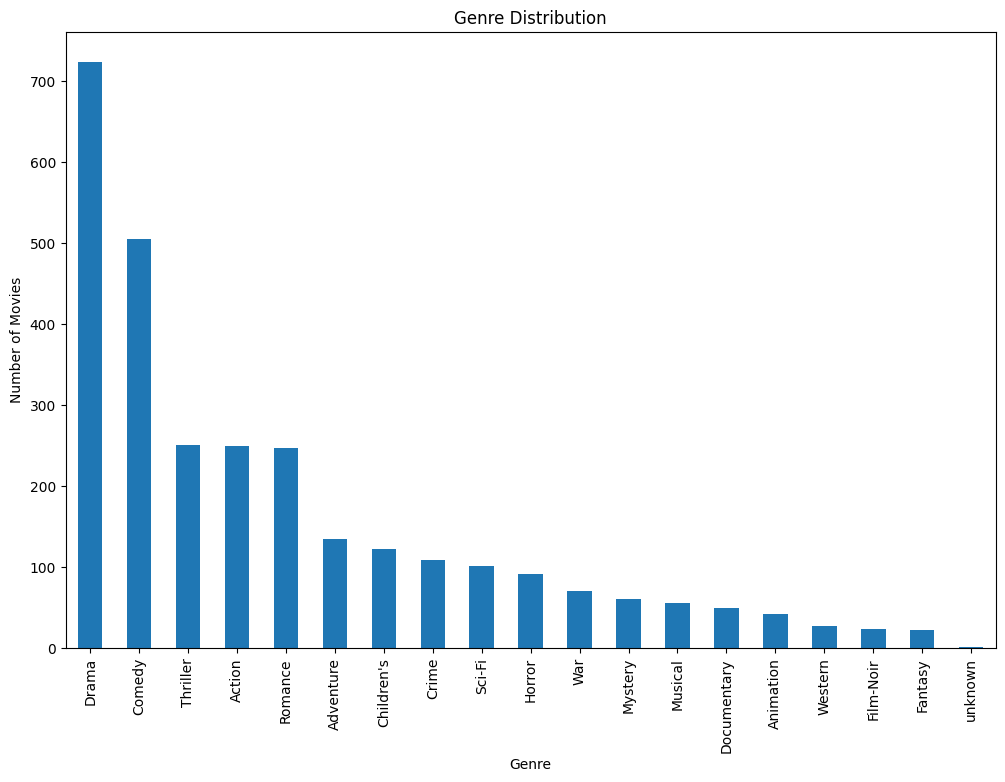

In [32]:
# Count the number of movies in each genre
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genre_counts = movies[genre_columns].sum().sort_values(ascending=False)

# Plot the genre distribution
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '405'),
  Text(1, 0, '655'),
  Text(2, 0, '13'),
  Text(3, 0, '450'),
  Text(4, 0, '276'),
  Text(5, 0, '416'),
  Text(6, 0, '537'),
  Text(7, 0, '303'),
  Text(8, 0, '234'),
  Text(9, 0, '393')])

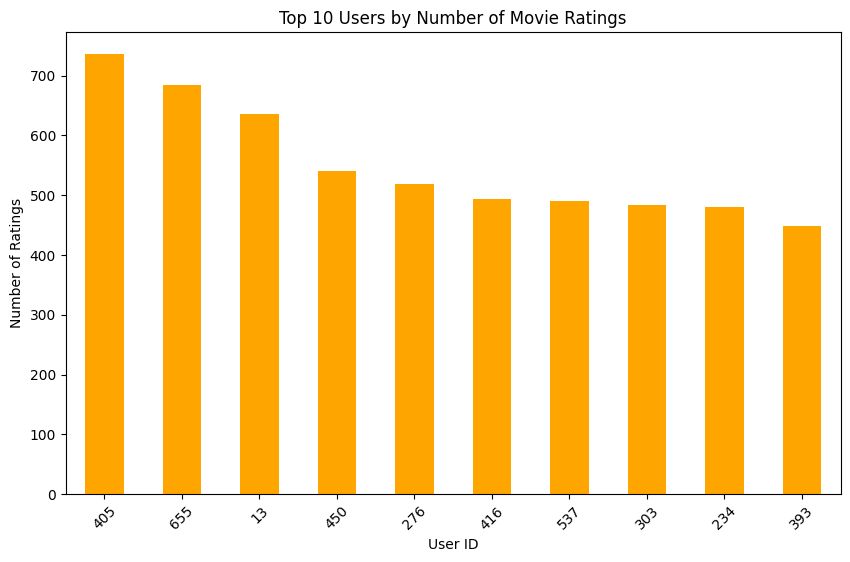

In [33]:
# Group by 'user_id' and count the number of ratings for each user
user_rating_counts = merged_data.groupby('user_id').size()

# Sort the users by the number of ratings in descending order and get the top 10
top_10_users = user_rating_counts.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_users.plot(kind='bar', color='orange')
plt.title('Top 10 Users by Number of Movie Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)

In [31]:
merged_data

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,302,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,377,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,51,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,346,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,880,476,3,1997-11-22 05:10:44,476,"First Wives Club, The (1996)",14-Sep-1996,http://us.imdb.com/M/title-exact?First%20Wives...,0,0,...,0,0,0,0,0,0,0,0,0,0
99983,716,204,5,1997-11-17 19:39:03,204,Back to the Future (1985),01-Jan-1985,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,0,0,0,0,0,1,0,0,0
99984,276,1090,1,1997-09-20 22:49:55,1090,Sliver (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,0,...,0,0,0,0,0,0,0,1,0,0
99985,13,225,2,1997-12-17 22:52:36,225,101 Dalmatians (1996),27-Nov-1996,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
merged_data=merged_data.drop('IMDb_URL',axis=1)

In [33]:
merged_data

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,242,Kolya (1996),24-Jan-1997,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,302,L.A. Confidential (1997),01-Jan-1997,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,377,Heavyweights (1994),01-Jan-1994,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,51,Legends of the Fall (1994),01-Jan-1994,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,346,Jackie Brown (1997),01-Jan-1997,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,880,476,3,1997-11-22 05:10:44,476,"First Wives Club, The (1996)",14-Sep-1996,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99983,716,204,5,1997-11-17 19:39:03,204,Back to the Future (1985),01-Jan-1985,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99984,276,1090,1,1997-09-20 22:49:55,1090,Sliver (1993),01-Jan-1993,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99985,13,225,2,1997-12-17 22:52:36,225,101 Dalmatians (1996),27-Nov-1996,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
len(merged_data['movie_title'].unique())

1661

In [35]:
movies_titles=merged_data['movie_title'].unique()

In [36]:
len(movies_titles)

1661

In [37]:
# Filter reviews for a specific movie
movie_title = 'Star Wars (1977)'
movie_reviews = merged_data[merged_data['movie_title'] == movie_title]

movie_reviews.head()


,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
499,290,50,5,1997-11-25 15:59:42,50,Star Wars (1977),01-Jan-1977,0,1,1,...,0,0,0,0,0,1,1,0,1,0
857,79,50,4,1998-03-30 15:25:45,50,Star Wars (1977),01-Jan-1977,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1052,2,50,5,1998-02-27 04:01:24,50,Star Wars (1977),01-Jan-1977,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1090,8,50,5,1997-11-12 19:15:24,50,Star Wars (1977),01-Jan-1977,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1121,274,50,5,1997-11-07 23:17:59,50,Star Wars (1977),01-Jan-1977,0,1,1,...,0,0,0,0,0,1,1,0,1,0


# Matrix factorization

In [62]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score
from scipy.sparse import csr_matrix

# Create mappings from original IDs to zero-indexed IDs
user_id_mapping = {id: index for index, id in enumerate(merged_data.user_id.unique())}
item_id_mapping = {id: index for index, id in enumerate(merged_data.item_id.unique())}

# Map original IDs to zero-indexed IDs
merged_data['user_id'] = merged_data['user_id'].map(user_id_mapping)
merged_data['item_id'] = merged_data['item_id'].map(item_id_mapping)

# Prepare the rating matrix as a sparse matrix
num_users = merged_data.user_id.nunique()
num_items = merged_data.item_id.nunique()
R = csr_matrix((merged_data.rating, (merged_data.user_id, merged_data.item_id)), shape=(num_users, num_items))

In [64]:
# Matrix Factorization function using vectorized operations
def matrix_factorization(R, P, Q, K, steps=1000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i, j, r in zip(*R.nonzero(), R.data):
            eij = r - np.dot(P[i, :], Q[:, j])
            P[i, :] += alpha * (2 * eij * Q[:, j] - beta * P[i, :])
            Q[:, j] += alpha * (2 * eij * P[i, :] - beta * Q[:, j])
        eR = P.dot(Q)
        e = np.sum((R.data - eR[R.nonzero()])**2)
        e += beta / 2 * (np.sum(P**2) + np.sum(Q**2))
        if e < 0.001:
            break
    return P, Q.T

# Function to evaluate metrics
def evaluate_metrics(R_true, R_pred):
    rmse = np.sqrt(mean_squared_error(R_true, R_pred))
    mae = mean_absolute_error(R_true, R_pred)

    # Flatten the matrices for precision, recall, and F1-score calculations
    R_true_flat = (R_true > 0).astype(int).flatten()
    R_pred_flat = (R_pred > np.mean(R_pred)).astype(int).flatten()

    precision = precision_score(R_true_flat, R_pred_flat, zero_division=0)
    recall = recall_score(R_true_flat, R_pred_flat, zero_division=0)
    f1 = f1_score(R_true_flat, R_pred_flat, zero_division=0)

    return rmse, mae, precision, recall, f1

# Define N and M based on the rating matrix R
N, M = R.shape

# Hyperparameter tuning
latent_sizes = [20, 30, 40, 50]
rmse_list = []

In [65]:
for K in latent_sizes:
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    nP, nQ = matrix_factorization(R, P, Q, K)
    nR = np.dot(nP, nQ.T)

    # Calculate RMSE and other metrics
    R_pred = np.copy(R.toarray())
    R_pred[R.toarray() > 0] = nR[R.toarray() > 0]
    rmse, mae, precision, recall, f1 = evaluate_metrics(R.toarray(), R_pred)

    rmse_list.append(rmse)
    print(f'Latent Size: {K} | RMSE: {rmse} | MAE: {mae} | Precision: {precision} | Recall: {recall} | F1-Score: {f1}')

Latent Size: 20 | RMSE: 0.21576550354397278 | MAE: 0.039881336224347044 | Precision: 1.0 | Recall: 0.9924990248732335 | F1-Score: 0.9962353933261052
Latent Size: 30 | RMSE: 0.20197990872012592 | MAE: 0.03696463771484441 | Precision: 1.0 | Recall: 0.9911788532509226 | F1-Score: 0.9955698872882889
Latent Size: 40 | RMSE: 0.1928834146029628 | MAE: 0.035073015359720884 | Precision: 1.0 | Recall: 0.9904187544380769 | F1-Score: 0.995186316678056
Latent Size: 50 | RMSE: 0.18791759062742286 | MAE: 0.03410667739533392 | Precision: 1.0 | Recall: 0.9898386790282737 | F1-Score: 0.994893394585792


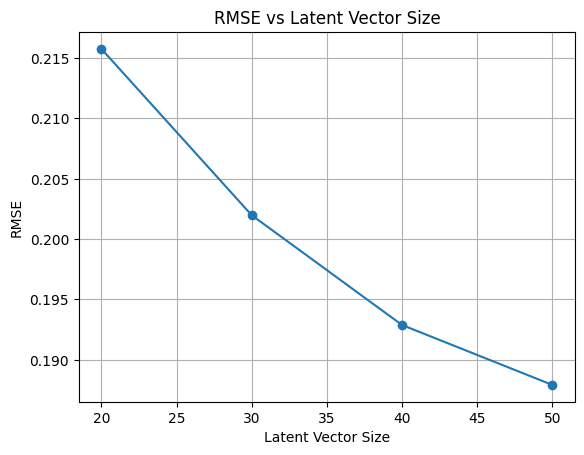

In [66]:
# Plot RMSE vs Latent Size
plt.plot(latent_sizes, rmse_list, marker='o')
plt.xlabel('Latent Vector Size')
plt.ylabel('RMSE')
plt.title('RMSE vs Latent Vector Size')
plt.grid(True)
plt.show()


In [67]:
# Choose best latent vector size
best_latent_size = latent_sizes[np.argmin(rmse_list)]
print(f'Best Latent Vector Size: {best_latent_size}')

# Train final model with best latent size
P = np.random.rand(N, best_latent_size)
Q = np.random.rand(M, best_latent_size)
nP, nQ = matrix_factorization(R, P, Q, best_latent_size)
nR = np.dot(nP, nQ.T)

Best Latent Vector Size: 50


In [68]:
# Recommend movies
def recommend_movies(user_id, top_n=10):
    user_index = user_id_mapping[user_id]
    user_ratings = nR[user_index]
    recommended_movie_indices = np.argsort(user_ratings)[::-1][:top_n]
    recommended_movie_ids = [item_id for item_id, index in item_id_mapping.items() if index in recommended_movie_indices]
    return recommended_movie_ids

# Example: Recommend top 10 movies for user 1
recommended_movies = recommend_movies(196, top_n=10)  # Use the original user ID
print(f'Top 10 recommended movies for user 1: {recommended_movies}')

Top 10 recommended movies for user 1: [870, 987, 1527, 1569, 1627, 1645, 1648, 1654, 1666, 1671]


In [72]:
recommended=merged_data[merged_data['item_id'].isin(recommended_movies)]
recommended['movie_title']

87863                         Homage (1995)
92224                 Delta of Venus (1994)
92225                 Delta of Venus (1994)
99631               Crude Oasis, The (1995)
99802        Wend Kuuni (God's Gift) (1982)
99923    Á köldum klaka (Cold Fever) (1994)
99949               Shadows (Cienie) (1988)
99952                  Sliding Doors (1998)
99959                 Pharaoh's Army (1995)
99973                 Next Step, The (1995)
99979               Butcher Boy, The (1998)
Name: movie_title, dtype: object

# Data Scraping

In [58]:
# import pandas as pd
# import re
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

# class Reviews:
#     def __init__(self, df):
#         self.movies = df
#         self.url = "https://www.imdb.com/"
#         self.tag_words = []
#         self.reviews = {}

#     def make_tagword(self):
#         pattern = r'^(.*?)\(.*[^)](.{5})$'
#         self.unique_movies = list(self.movies['movie_title'].unique())
#         for tag in self.unique_movies:
#             match = re.search(pattern, tag)
#             if match:
#                 before_bracket = match.group(1)
#                 last_five = match.group(2)
#                 self.tag_words.append(before_bracket + " " + last_five)
#             else:
#                 self.tag_words.append(tag)

#     def initiate_driver(self):
#         driver_path = 'C:/Users/Dell/Downloads/chromedriver-win64 (1)/chromedriver-win64/chromedriver.exe'  # Update with the correct path
#         service = Service(driver_path)
#         options = webdriver.ChromeOptions()
#         options.headless = False  # Set to True if you want headless mode
#         self.driver = webdriver.Chrome(service=service, options=options)
#         self.wait = WebDriverWait(self.driver, 10)
#         self.driver.get(self.url)

#     def get_search_box(self):
#         try:
#             self.search_box = WebDriverWait(self.driver, 10).until(
#                 EC.presence_of_element_located((By.ID, "suggestion-search"))
#             )
#         except Exception as e:
#             print(f"Failed to locate search box: {e}")
#             self.search_box = None

#     def make_search(self, tag):
#         if not hasattr(self, 'search_box') or self.search_box is None:
#             print("Search box is not initialized.")
#             return False
#         print(f"Searching for: {tag}")
#         self.search_box.clear()
#         self.search_box.send_keys(tag)
#         self.search_box.send_keys(Keys.RETURN)
#         try:
#             link = WebDriverWait(self.driver, 10).until(
#                 EC.presence_of_element_located((By.CLASS_NAME, 'ipc-metadata-list-summary-item__t'))
#             )
#             self.driver.execute_script("arguments[0].scrollIntoView();", link)
#             self.driver.execute_script("arguments[0].click();", link)
#         except Exception as e:
#             print(f"Failed to find or click the movie link for {tag}: {e}")
#             return False
#         return True

#     def click_reviews(self):
#         try:
#             user_review_links = WebDriverWait(self.driver, 10).until(
#                 EC.presence_of_element_located((By.XPATH, '//a[contains(@href, "/reviews")]'))
#             )
#             self.driver.execute_script("arguments[0].scrollIntoView();", user_review_links)
#             self.driver.execute_script("arguments[0].click();", user_review_links)
#         except Exception as e:
#             print(f"Failed to click reviews: {e}")
#             return False
#         return True

#     def get_reviews(self, tag):
#         try:
#             div_elements = WebDriverWait(self.driver, 10).until(
#                 EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'div.text.show-more__control.clickable'))
#             )
#             reviews_text = [div.text for div in div_elements[:10]]
#             self.reviews[tag] = reviews_text
#         except Exception as e:
#             print(f"Failed to get reviews for {tag}: {e}")

#     def go_back(self):
#         self.driver.back()

#     def close_driver(self):
#         self.driver.quit()

#     def reviews_to_dataframe(self):
#         reviews_dict = {}
#         for movie, reviews in self.reviews.items():
#             combined_reviews = " ".join(reviews)
#             reviews_dict[movie] = combined_reviews

#         reviews_df = pd.DataFrame(list(reviews_dict.items()), columns=['movie_title', 'reviews'])
#         return reviews_df

#     def save_dataframe_as_csv(self, df, filename='movies_with_reviews.csv'):
#         df.to_csv(filename, index=False)

In [ ]:
# a= merged_df.drop_duplicates(subset='movie_title')
# a = a.reset_index(drop=True)
# a=a[['movie_title']]
# a

In [ ]:
# # Initialize and run the review scraper
# rev = Reviews(a)
# rev.make_tagword()
# rev.initiate_driver()

# # IMDb review scraping
# for tag in rev.tag_words:
#     rev.get_search_box()  # Ensure search box is initialized
#     if rev.make_search(tag):
#         if rev.click_reviews():
#             rev.get_reviews(tag)
#         rev.go_back()

# rev.close_driver()

# # Add reviews to the DataFrame
# reviews_df = rev.reviews_to_dataframe()
# a_with_reviews = pd.merge(a, reviews_df, how='left', on='movie_title')

# # Save DataFrame with reviews to CSV
# rev.save_dataframe_as_csv(a_with_reviews)

# print("DataFrame with reviews has been saved to 'movies_with_reviews.csv'.")

# reviews_df.to_csv('output1.csv')

- We scraped the data usingg Selenium. The user reviews from IMDB were extracted with the help of chrome driver and selenium.

# Sentiment Analysis

In [38]:
movie_rev=pd.read_csv('output1.csv')

In [39]:
movie_rev

,Unnamed: 0,movie_title,reviews
0,0,Kolya (1996),What is a man to do who has resisted marriage ...
1,1,L.A. Confidential (1997),Give a collection of great actors a great stor...
2,2,Heavyweights (1994),"Despite being a child of the '90s, somehow I m..."
3,3,Legends of the Fall (1994),I have enjoyed watching the film a number of t...
4,4,Jackie Brown (1997),"Coming as it did after critical darlings ""Rese..."
...,...,...,...
1521,1521,Mamma Roma (1962),"As my first Pasolini film, Mamma Roma is as go..."
1522,1522,"Eighth Day, The (1996)","Everyone we meet influences our thinking, modi..."
1523,1523,Girls Town (1996),"At the center of this largely improvised, some..."
1524,1524,"Silence of the Palace, The 1994)",Young FBI Agent Clarice Starling is chasing a ...


- We scraped reviews of 1526 movies.

In [40]:
movie_rev=movie_rev.drop('Unnamed: 0',axis=1)

In [41]:
movie_rev

,movie_title,reviews
0,Kolya (1996),What is a man to do who has resisted marriage ...
1,L.A. Confidential (1997),Give a collection of great actors a great stor...
2,Heavyweights (1994),"Despite being a child of the '90s, somehow I m..."
3,Legends of the Fall (1994),I have enjoyed watching the film a number of t...
4,Jackie Brown (1997),"Coming as it did after critical darlings ""Rese..."
...,...,...
1521,Mamma Roma (1962),"As my first Pasolini film, Mamma Roma is as go..."
1522,"Eighth Day, The (1996)","Everyone we meet influences our thinking, modi..."
1523,Girls Town (1996),"At the center of this largely improvised, some..."
1524,"Silence of the Palace, The 1994)",Young FBI Agent Clarice Starling is chasing a ...


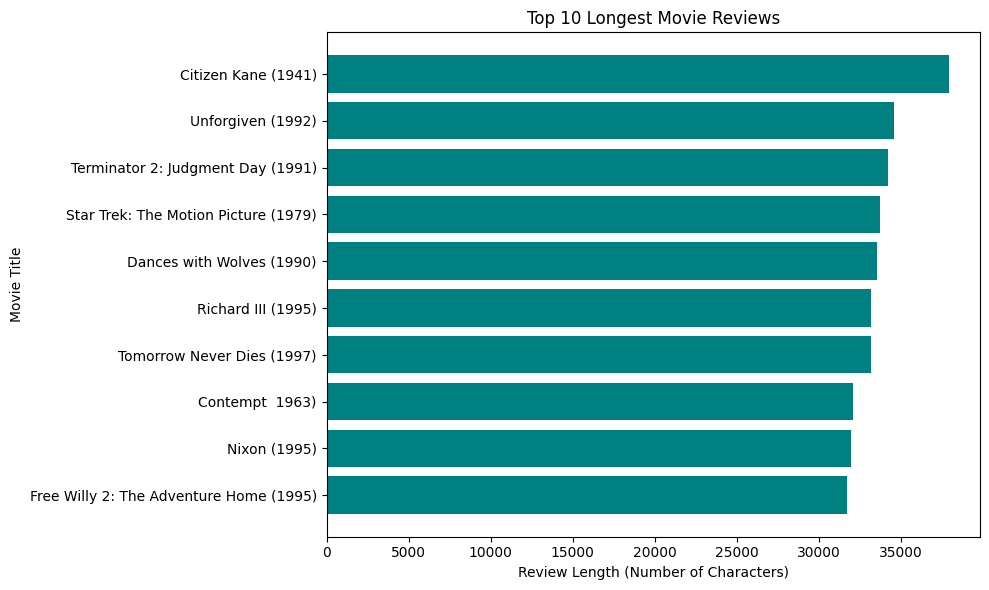

In [42]:
# Calculate the length of each review
movie_rev['review_length'] = movie_rev['reviews'].apply(len)

# Sort the DataFrame by the length of the reviews in descending order and get the top 10
top_10_longest_reviews = movie_rev.sort_values(by='review_length', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_longest_reviews['movie_title'], top_10_longest_reviews['review_length'], color='teal')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Movie Title')
plt.title('Top 10 Longest Movie Reviews')
plt.gca().invert_yaxis()  # Invert the y-axis to show the longest review at the top
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
movie_rev=movie_rev.drop('review_length',axis=1)
movie_rev.head()

,movie_title,reviews
0,Kolya (1996),What is a man to do who has resisted marriage ...
1,L.A. Confidential (1997),Give a collection of great actors a great stor...
2,Heavyweights (1994),"Despite being a child of the '90s, somehow I m..."
3,Legends of the Fall (1994),I have enjoyed watching the film a number of t...
4,Jackie Brown (1997),"Coming as it did after critical darlings ""Rese..."


In [44]:
import re
import string
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stopwords=stopwords.words('english')
ps=PorterStemmer()

In [45]:
#text preprocessing
def clean_text(text):
    text=' '.join(i.lower() for i in text.split())
    text=''.join(i for i in text if i not in string.punctuation)
    text=' '.join(i for i in text.split() if i not in stopwords)
    text=' '.join(ps.stem(i) for i in text.split())
    return text

In [46]:
movie_rev['comments_cleaned']=movie_rev['reviews'].apply(clean_text)

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
movie_rev['sentiment_score'] = movie_rev['comments_cleaned'].apply(lambda comments: sum([analyzer.polarity_scores(comment)['compound'] for comment in comments])/len(comments) if comments else 0)
top_10_positive_sentiment_videos = movie_rev.nlargest(10, 'sentiment_score')

In [48]:
movie_rev

,movie_title,reviews,comments_cleaned,sentiment_score
0,Kolya (1996),What is a man to do who has resisted marriage ...,man resist marriag late middl age enter fraudu...,0.024195
1,L.A. Confidential (1997),Give a collection of great actors a great stor...,give collect great actor great stori work like...,0.023035
2,Heavyweights (1994),"Despite being a child of the '90s, somehow I m...",despit child 90 somehow miss heavyweight entir...,0.021511
3,Legends of the Fall (1994),I have enjoyed watching the film a number of t...,enjoy watch film number time sever period life...,0.022597
4,Jackie Brown (1997),"Coming as it did after critical darlings ""Rese...",come critic darl reservoir dog pulp fiction pe...,0.022036
...,...,...,...,...
1521,Mamma Roma (1962),"As my first Pasolini film, Mamma Roma is as go...",first pasolini film mamma roma good introduct ...,0.023088
1522,"Eighth Day, The (1996)","Everyone we meet influences our thinking, modi...",everyon meet influenc think modifi way littl b...,0.021342
1523,Girls Town (1996),"At the center of this largely improvised, some...",center larg improvis sometim move mostli flat ...,0.021774
1524,"Silence of the Palace, The 1994)",Young FBI Agent Clarice Starling is chasing a ...,young fbi agent claric starl chase ruthless se...,0.024848


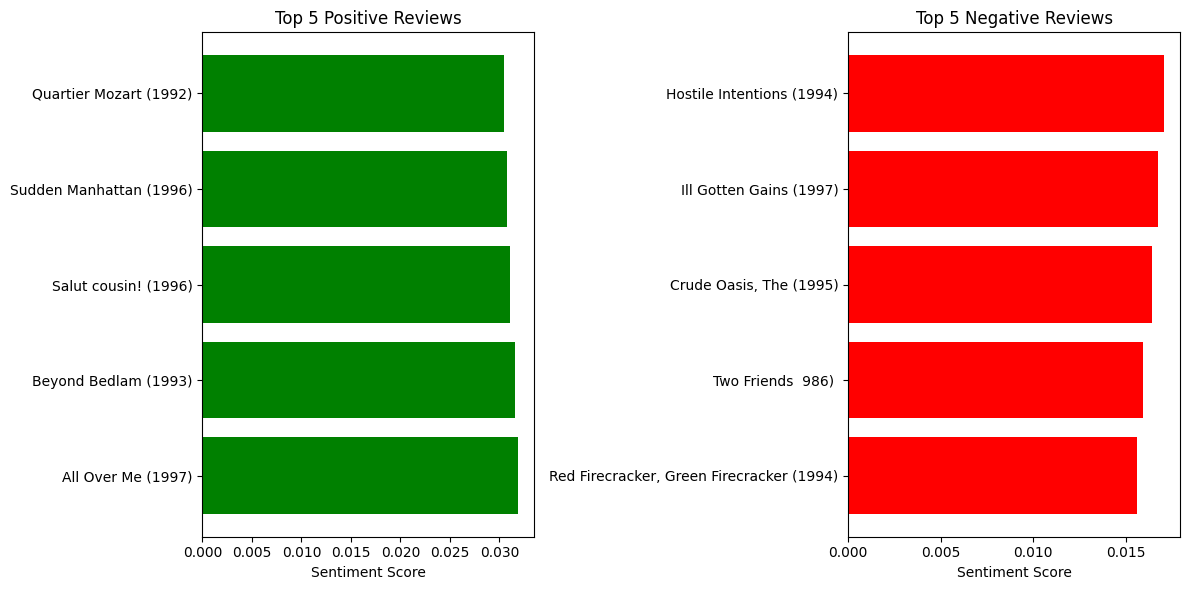

In [49]:
# Sorting for most positive and most negative reviews
most_positive =movie_rev.sort_values(by="sentiment_score", ascending=False).head(5)
most_negative = movie_rev.sort_values(by="sentiment_score", ascending=True).head(5)

# Plotting
plt.figure(figsize=(12, 6))

# Most Positive Reviews
plt.subplot(1, 2, 1)
plt.barh(most_positive["movie_title"], most_positive["sentiment_score"], color='green')
plt.xlabel('Sentiment Score')
plt.title('Top 5 Positive Reviews')

# Most Negative Reviews
plt.subplot(1, 2, 2)
plt.barh(most_negative["movie_title"], most_negative["sentiment_score"], color='red')
plt.xlabel('Sentiment Score')
plt.title('Top 5 Negative Reviews')

plt.tight_layout()
plt.show()

In [60]:
top_10_positive_sentiment_videos

,movie_title,reviews,comments_cleaned,sentiment_score
1243,All Over Me (1997),New York -1990s. Claude is a teenager of our t...,new york 1990 claud teenag time daughter divor...,0.031923
1131,Beyond Bedlam (1993),"Oh, the pain, the pain! This was a truly awful...",oh pain pain truli aw movi saw video nightscar...,0.031529
1337,Salut cousin! (1996),I happened to see this film on TV and I'm happ...,happen see film tv im happi touch stori young ...,0.031022
1443,Sudden Manhattan (1996),This was the first feature film directed by th...,first featur film direct multital adrienn shel...,0.030815
1421,Quartier Mozart (1992),I must say there are some ratings on the IMDb ...,must say rate imdb indic good film wrote simil...,0.030480
1076,Catwalk (1995),Christy Turlington is the perfect person for d...,christi turlington perfect person document mod...,0.029872
1241,Mr. Wonderful (1993),New York electrician Matt Dillon (as Gus DeMar...,new york electrician matt dillon gu demarco wa...,0.029770
1445,Harlem (1993),"""Sugar Hill"" tells the story of two Harlem dru...",sugar hill tell stori two harlem drugdeal brot...,0.029613
1437,Lamerica (1994),I first saw 'Lamerica' at its British premiere...,first saw lamerica british premier edinburgh f...,0.029543
1473,Jupiter's Wife (1994),This is a very unusual documentary film. A fil...,unusu documentari film film maker michel negro...,0.029311


In [61]:
movie_rev

,movie_title,reviews,comments_cleaned,sentiment_score
0,Kolya (1996),What is a man to do who has resisted marriage ...,man resist marriag late middl age enter fraudu...,0.024195
1,L.A. Confidential (1997),Give a collection of great actors a great stor...,give collect great actor great stori work like...,0.023035
2,Heavyweights (1994),"Despite being a child of the '90s, somehow I m...",despit child 90 somehow miss heavyweight entir...,0.021511
3,Legends of the Fall (1994),I have enjoyed watching the film a number of t...,enjoy watch film number time sever period life...,0.022597
4,Jackie Brown (1997),"Coming as it did after critical darlings ""Rese...",come critic darl reservoir dog pulp fiction pe...,0.022036
...,...,...,...,...
1521,Mamma Roma (1962),"As my first Pasolini film, Mamma Roma is as go...",first pasolini film mamma roma good introduct ...,0.023088
1522,"Eighth Day, The (1996)","Everyone we meet influences our thinking, modi...",everyon meet influenc think modifi way littl b...,0.021342
1523,Girls Town (1996),"At the center of this largely improvised, some...",center larg improvis sometim move mostli flat ...,0.021774
1524,"Silence of the Palace, The 1994)",Young FBI Agent Clarice Starling is chasing a ...,young fbi agent claric starl chase ruthless se...,0.024848


In [62]:
merged_data

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,242,Kolya (1996),24-Jan-1997,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,1998-04-04 19:22:22,302,L.A. Confidential (1997),01-Jan-1997,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,1997-11-07 07:18:36,377,Heavyweights (1994),01-Jan-1994,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,1997-11-27 05:02:03,51,Legends of the Fall (1994),01-Jan-1994,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,1998-02-02 05:33:16,346,Jackie Brown (1997),01-Jan-1997,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,880,476,3,1997-11-22 05:10:44,476,"First Wives Club, The (1996)",14-Sep-1996,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99983,716,204,5,1997-11-17 19:39:03,204,Back to the Future (1985),01-Jan-1985,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99984,276,1090,1,1997-09-20 22:49:55,1090,Sliver (1993),01-Jan-1993,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99985,13,225,2,1997-12-17 22:52:36,225,101 Dalmatians (1996),27-Nov-1996,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Merging Sentiment data

In [50]:
final_df = pd.merge(movie_rev, merged_data, on='movie_title', how='inner')

In [51]:
final_df

,movie_title,reviews,comments_cleaned,sentiment_score,user_id,item_id,rating,timestamp,movie_id,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Kolya (1996),What is a man to do who has resisted marriage ...,man resist marriag late middl age enter fraudu...,0.024195,196,242,3,1997-12-04 15:55:49,242,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,Kolya (1996),What is a man to do who has resisted marriage ...,man resist marriag late middl age enter fraudu...,0.024195,63,242,3,1997-10-01 23:06:30,242,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,Kolya (1996),What is a man to do who has resisted marriage ...,man resist marriag late middl age enter fraudu...,0.024195,226,242,5,1998-01-04 04:37:51,242,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,Kolya (1996),What is a man to do who has resisted marriage ...,man resist marriag late middl age enter fraudu...,0.024195,154,242,3,1997-11-10 05:03:55,242,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,Kolya (1996),What is a man to do who has resisted marriage ...,man resist marriag late middl age enter fraudu...,0.024195,306,242,5,1997-10-10 17:16:33,242,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92257,Getting Away With Murder (1996),"Dan Ayrkoyd, looking boxy and well-scrubbed, p...",dan ayrkoyd look boxi wellscrub play colleg pr...,0.024237,747,1659,1,1998-03-01 06:21:53,1659,12-Apr-1996,...,0,0,0,0,0,0,0,0,0,0
92258,Mamma Roma (1962),"As my first Pasolini film, Mamma Roma is as go...",first pasolini film mamma roma good introduct ...,0.023088,840,1674,4,1998-03-29 22:48:02,1674,01-Jan-1962,...,0,0,0,0,0,0,0,0,0,0
92259,"Eighth Day, The (1996)","Everyone we meet influences our thinking, modi...",everyon meet influenc think modifi way littl b...,0.021342,655,1640,3,1998-02-26 06:30:46,1640,01-Nov-1996,...,0,0,0,0,0,0,0,0,0,0
92260,Girls Town (1996),"At the center of this largely improvised, some...",center larg improvis sometim move mostli flat ...,0.021774,655,1637,3,1998-03-04 04:04:15,1637,23-Aug-1996,...,0,0,0,0,0,0,0,0,0,0


- After extracting data and combining with the dataframe we had 92262 rows.

In [52]:
final_df.isnull().sum()

movie_title         0
reviews             0
comments_cleaned    0
sentiment_score     0
user_id             0
item_id             0
rating              0
timestamp           0
movie_id            0
release_date        0
unknown             0
Action              0
Adventure           0
Animation           0
Children's          0
Comedy              0
Crime               0
Documentary         0
Drama               0
Fantasy             0
Film-Noir           0
Horror              0
Musical             0
Mystery             0
Romance             0
Sci-Fi              0
Thriller            0
War                 0
Western             0
dtype: int64

In [53]:
len(final_df['movie_title'].unique())

1452

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92262 entries, 0 to 92261
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   movie_title       92262 non-null  object        
 1   reviews           92262 non-null  object        
 2   comments_cleaned  92262 non-null  object        
 3   sentiment_score   92262 non-null  float64       
 4   user_id           92262 non-null  int64         
 5   item_id           92262 non-null  int64         
 6   rating            92262 non-null  int64         
 7   timestamp         92262 non-null  datetime64[ns]
 8   movie_id          92262 non-null  int64         
 9   release_date      92262 non-null  object        
 10  unknown           92262 non-null  int64         
 11  Action            92262 non-null  int64         
 12  Adventure         92262 non-null  int64         
 13  Animation         92262 non-null  int64         
 14  Children's        9226

# Hybrid

In [152]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Neural Network Model
class AdvancedHybridRecommender(nn.Module):
    def __init__(self, num_users, num_items, num_genres, latent_dim):
        super(AdvancedHybridRecommender, self).__init__()
        self.user_embedding = nn.Embedding(num_users, latent_dim)
        self.item_embedding = nn.Embedding(num_items, latent_dim)
        self.genre_embedding = nn.Embedding(num_genres, latent_dim)
        
    
        self.fc1 = nn.Linear(latent_dim * 3, latent_dim * 2)
        self.batch_norm = nn.BatchNorm1d(latent_dim * 2)
        self.fc2 = nn.Linear(latent_dim * 2, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, user_ids, item_ids, genre_ids):
        user_emb = self.user_embedding(user_ids)
        item_emb = self.item_embedding(item_ids)
        genre_emb = self.genre_embedding(genre_ids)
        
        x = torch.cat([user_emb, item_emb, genre_emb], dim=1)
        x = self.fc1(x)
        x = self.batch_norm(x)  # Apply batch normalization after the first linear layer
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x.squeeze()

# Data Preprocessing
def preprocess_data(df):
    user_encoder = LabelEncoder()
    item_encoder = LabelEncoder()
    genre_encoder = LabelEncoder()

    df['user_id'] = user_encoder.fit_transform(df['user_id'])
    df['item_id'] = item_encoder.fit_transform(df['item_id'])
    genre_labels = df[['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].idxmax(axis=1)
    df['genre_id'] = genre_encoder.fit_transform(genre_labels)

    scaler = StandardScaler()
    df['sentiment_score'] = scaler.fit_transform(df[['sentiment_score']])
    
    return df, user_encoder, item_encoder, genre_encoder

# Hyperparameter tuning
latent_dims = [20, 30, 40, 50]
num_epochs = 20
batch_size = 64
results = []

In [154]:
final_df, user_encoder, item_encoder, genre_encoder = preprocess_data(final_df)
num_users = len(user_encoder.classes_)
num_items = len(item_encoder.classes_)
num_genres = len(genre_encoder.classes_)

# Spliting data into training and test sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

for latent_dim in latent_dims:
    model = AdvancedHybridRecommender(num_users, num_items, num_genres, latent_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # DataLoader
    train_data = torch.utils.data.TensorDataset(
        torch.tensor(train_df['user_id'].values, dtype=torch.long),
        torch.tensor(train_df['item_id'].values, dtype=torch.long),
        torch.tensor(train_df['genre_id'].values, dtype=torch.long),
        torch.tensor(train_df['rating'].values, dtype=torch.float32)
    )
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for user_ids, item_ids, genre_ids, ratings in train_loader:
            optimizer.zero_grad()
            predictions = model(user_ids, item_ids, genre_ids)
            loss = criterion(predictions, ratings)
            loss.backward()
            optimizer.step()
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        test_data = torch.utils.data.TensorDataset(
            torch.tensor(test_df['user_id'].values, dtype=torch.long),
            torch.tensor(test_df['item_id'].values, dtype=torch.long),
            torch.tensor(test_df['genre_id'].values, dtype=torch.long),
            torch.tensor(test_df['rating'].values, dtype=torch.float32)
        )
        test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

        all_predictions = []
        all_ratings = []

        for user_ids, item_ids, genre_ids, ratings in test_loader:
            predictions = model(user_ids, item_ids, genre_ids)
            all_predictions.extend(predictions.numpy())
            all_ratings.extend(ratings.numpy())

        rmse = np.sqrt(mean_squared_error(all_ratings, all_predictions))
        mae = mean_absolute_error(all_ratings, all_predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(
            np.array(all_ratings) > 0, np.array(all_predictions) > 0, average='binary'
        )
        print('latent_dim:', latent_dim,
            'RMSE:', rmse,
            'MAE:', mae,
            'Precision:', precision,
            'Recall:', recall,
            'F1:', f1)

        results.append({
            'latent_dim': latent_dim,
            'RMSE': rmse,
            'MAE': mae,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })

latent_dim: 20 RMSE: 0.9557786 MAE: 0.76108176 Precision: 1.0 Recall: 1.0 F1: 1.0
latent_dim: 30 RMSE: 0.9527674 MAE: 0.75459087 Precision: 1.0 Recall: 1.0 F1: 1.0
latent_dim: 40 RMSE: 0.95081496 MAE: 0.7545192 Precision: 1.0 Recall: 1.0 F1: 1.0
latent_dim: 50 RMSE: 0.9490213 MAE: 0.75116307 Precision: 1.0 Recall: 1.0 F1: 1.0


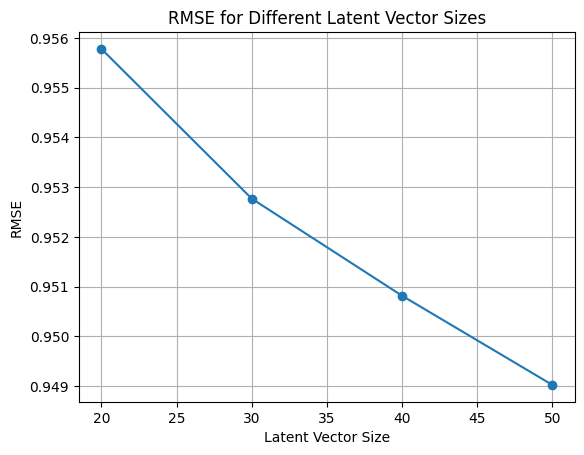

Best Latent Vector Size: 50 with RMSE: 0.9490212798118591


In [155]:
# Visualization
plt.plot([res['latent_dim'] for res in results], [res['RMSE'] for res in results], marker='o')
plt.xlabel('Latent Vector Size')
plt.ylabel('RMSE')
plt.title('RMSE for Different Latent Vector Sizes')
plt.grid()
plt.show()

# Best latent vector size
best_result = min(results, key=lambda x: x['RMSE'])
print(f"Best Latent Vector Size: {best_result['latent_dim']} with RMSE: {best_result['RMSE']}")


In [150]:
results

[{'latent_dim': 20,
  'RMSE': 0.9526466,
  'MAE': 0.7551173,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1': 1.0},
 {'latent_dim': 30,
  'RMSE': 0.95103943,
  'MAE': 0.7545916,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1': 1.0},
 {'latent_dim': 40,
  'RMSE': 0.9476269,
  'MAE': 0.75406057,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1': 1.0},
 {'latent_dim': 50,
  'RMSE': 0.95049816,
  'MAE': 0.751682,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1': 1.0}]

In [158]:
import numpy as np
import pandas as pd

def get_recommendations(user_id, model, item_encoder, num_items, num_genres):
    model.eval()
    with torch.no_grad():
        # Create a DataFrame with all items for the given user
        user_ids = np.array([user_id] * num_items)
        item_ids = np.arange(num_items)
        genre_ids = np.random.randint(0, num_genres, num_items)  # Random genres for demo
        
        # Converting to tensors
        user_ids_tensor = torch.tensor(user_ids, dtype=torch.long)
        item_ids_tensor = torch.tensor(item_ids, dtype=torch.long)
        genre_ids_tensor = torch.tensor(genre_ids, dtype=torch.long)
        
        # Predicting ratings
        predictions = model(user_ids_tensor, item_ids_tensor, genre_ids_tensor)
        predictions = predictions.numpy()
        
        # Decode item IDs to movie titles
        items = [item_encoder.classes_[i] for i in item_ids]
        
        # Creating DataFrame for predictions
        recommendations_df = pd.DataFrame({
            'item': items,
            'predicted_rating': predictions
        })
        
        # Sort by predicted rating and get top recommendations
        recommendations_df = recommendations_df.sort_values(by='predicted_rating', ascending=False)
        top_recommendations = recommendations_df.head(10)  # Top 10 recommendations
        
        # Return only movie titles
        return top_recommendations['item'].tolist()

# Example usage:
user_id = 196  # Replace with the user ID you want recommendations for
top_movie_titles = get_recommendations(user_id, model, item_encoder, num_items, num_genres)
print(top_movie_titles)

[837, 467, 1275, 91, 78, 1257, 105, 125, 1369, 1210]


In [166]:
recommended=merged_data[merged_data['item_id'].isin(top_movie_titles)]
recommended['movie_title'].unique()

array(['Free Willy (1993)', 'Nightmare Before Christmas, The (1993)',
       'Phenomenon (1996)', 'Sgt. Bilko (1996)', 'Bronx Tale, A (1993)',
       'Virtuosity (1995)', 'Meet John Doe (1941)',
       'Forbidden Christ, The (Cristo proibito, Il) (1950)',
       'Designated Mourner, The (1997)',
       'Killer (Bulletproof Heart) (1994)'], dtype=object)